<a href="https://colab.research.google.com/github/palomabareli/PythoBrasil2020_IntroAoMachineLearnig/blob/main/Binary_Classification_Tutorial_(CLF101)_Level_Beginner_(ACN_EDITS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <span style="color:orange">Binary Classification Tutorial (CLF101) - Level Beginner</span>

**Created using: PyCaret 2.0** <br />
**Date Updated: August 24, 2020**

# 1.0 Tutorial Objective
Welcome to the Binary Classification Tutorial (CLF101) - Level Beginner. This tutorial assumes that you are new to PyCaret and looking to get started with Binary Classification using the `pycaret.classification` Module.

In this tutorial we will learn:


* **Getting Data:**  How to import data from PyCaret repository
* **Setting up Environment:**  How to setup an experiment in PyCaret and get started with building classification models
* **Create Model:**  How to create a model, perform stratified cross validation and evaluate classification metrics
* **Tune Model:**  How to automatically tune the hyper-parameters of a classification model
* **Plot Model:**  How to analyze model performance using various plots
* **Finalize Model:** How to finalize the best model at the end of the experiment
* **Predict Model:**  How to make predictions on new / unseen data
* **Save / Load Model:**  How to save / load a model for future use

Read Time : Approx. 30 Minutes


## 1.1 Installing PyCaret
The first step to get started with PyCaret is to install pycaret. Installation is easy and will only take a few minutes. Follow the instructions below:

#### Installing PyCaret in Local Jupyter Notebook
`pip install pycaret`  <br />

#### Installing PyCaret on Google Colab or Azure Notebooks
`!pip install pycaret`


## 1.2 Pre-Requisites
- Python 3.6 or greater
- PyCaret 2.0 or greater
- Internet connection to load data from pycaret's repository
- Basic Knowledge of Binary Classification

## 1.3 For Google colab users:
If you are running this notebook on Google colab, run the following code at top of your notebook to display interactive visuals.<br/>
<br/>
`from pycaret.utils import enable_colab` <br/>
`enable_colab()`


## 1.4 See also:
- __[Binary Classification Tutorial (CLF102) - Intermediate Level](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Intermediate%20-%20CLF102.ipynb)__
- __[Binary Classification Tutorial (CLF103) - Expert Level](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Expert%20-%20CLF103.ipynb)__

In [4]:
!pip install pycaret

In [2]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2.0 What is Binary Classification?
Binary classification is a supervised machine learning technique where the goal is to predict categorical class labels which are discrete and unoredered such as Pass/Fail, Positive/Negative, Default/Not-Default etc. A few real world use cases for classification are listed below:

- Medical testing to determine if a patient has a certain disease or not - the classification property is the presence of the disease.
- A "pass or fail" test method or quality control in factories, i.e. deciding if a specification has or has not been met – a go/no-go classification.
- Information retrieval, namely deciding whether a page or an article should be in the result set of a search or not – the classification property is the relevance of the article, or the usefulness to the user.

__[Learn More about Binary Classification](https://medium.com/@categitau/in-one-of-my-previous-posts-i-introduced-machine-learning-and-talked-about-the-two-most-common-c1ac6e18df16)__

# 3.0 Overview of the Classification Module in PyCaret
PyCaret's classification module (`pycaret.classification`) is a supervised machine learning module which is used for classifying the elements into a binary group based on various techniques and algorithms. Some common use cases of classification problems include predicting customer default (yes or no), customer churn (customer will leave or stay), disease found (positive or negative).

The PyCaret classification module can be used for Binary or Multi-class classification problems. It has over 18 algorithms and 14 plots to analyze the performance of models. Be it hyper-parameter tuning, ensembling or advanced techniques like stacking, PyCaret's classification module has it all.

# 4.0 Dataset for the Tutorial

For this tutorial we will use a dataset from UCI called **Default of Credit Card Clients Dataset**. This dataset contains information on default payments, demographic factors, credit data, payment history, and billing statements of credit card clients in Taiwan from April 2005 to September 2005. There are 24,000 samples and 25 features. Short descriptions of each column are as follows:

- **ID:** ID of each client
- **LIMIT_BAL:** Amount of given credit in NT dollars (includes individual and family/supplementary credit)
- **SEX:** Gender (1=male, 2=female)
- **EDUCATION:** (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- **MARRIAGE:** Marital status (1=married, 2=single, 3=others)
- **AGE:** Age in years
- **PAY_0 to PAY_6:** Repayment status by n months ago (PAY_0 = last month ... PAY_6 = 6 months ago) (Labels: -1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- **BILL_AMT1 to BILL_AMT6:** Amount of bill statement by n months ago ( BILL_AMT1 = last_month .. BILL_AMT6 = 6 months ago)
- **PAY_AMT1 to PAY_AMT6:** Amount of payment by n months ago ( BILL_AMT1 = last_month .. BILL_AMT6 = 6 months ago)
- **default:** Default payment (1=yes, 0=no) `Target Column`

#### Dataset Acknowledgement:
Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science.

The original dataset and data dictionary can be __[found here.](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)__ 

# 5.0 Getting the Data

You can download the data from the original source __[found here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)__ and load it using pandas __[(Learn How)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)__ or you can use PyCaret's data respository to load the data using the `get_data()` function (This will require an internet connection).

In [6]:
from pycaret.datasets import get_data
dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [7]:
#check the shape of data
dataset.shape

(24000, 24)

In order to demonstrate the `predict_model()` function on unseen data, a sample of 1200 records has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 1200 records are not available at the time when the machine learning experiment was performed.

In [8]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (22800, 24)
Unseen Data For Predictions: (1200, 24)


# 6.0 Setting up Environment in PyCaret

The `setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. `setup()` must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When `setup()` is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after `setup()` is executed. If all of the data types are correctly identified `enter` can be pressed to continue or `quit` can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In later tutorials we will learn how to overwrite PyCaret's infered data type using the `numeric_features` and `categorical_features` parameters in `setup()`.

In [9]:
from pycaret.classification import *

In [10]:
exp_clf101 = setup(data = data, target = 'default', session_id=123) 

,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(22800, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when `setup()` is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

- **session_id :**  A pseduo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the `session_id` is set as `123` for later reproducibility.<br/>
<br/>
- **Target Type :**  Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.<br/>
<br/>
- **Label Encoded :**  When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this experiment no label encoding is required since the target variable is of type numeric. <br/>
<br/>
- **Original Data :**  Displays the original shape of the dataset. In this experiment (22800, 24) means 22,800 samples and 24 features including the target column. <br/>
<br/>
- **Missing Values :**  When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset. 
<br/>
<br/>
- **Numeric Features :**  The number of features inferred as numeric. In this dataset, 14 out of 24 features are inferred as numeric. <br/>
<br/>
- **Categorical Features :**  The number of features inferred as categorical. In this dataset, 9 out of 24 features are inferred as categorical. <br/>
<br/>
- **Transformed Train Set :**  Displays the shape of the transformed training set. Notice that the original shape of (22800, 24) is transformed into (15959, 91) for the transformed train set and the number of features have increased to 91 from 24 due to categorical encoding <br/>
<br/>
- **Transformed Test Set :**  Displays the shape of the transformed test/hold-out set. There are 6841 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the `train_size` parameter in setup. <br/>

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation (in this case there are no missing values in the training data, but we still need imputers for unseen data), categorical encoding etc. Most of the parameters in `setup()` are optional and used for customizing the pre-processing pipeline. These parameters are out of scope for this tutorial but as you progress to the intermediate and expert levels, we will cover them in much greater detail.

# 7.0 Comparing All Models

Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case). This function trains all models in the model library and scores them using stratified cross validation for metric evaluation. The output prints a score grid that shows average Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC accross the folds (10 by default) along with training times.

In [11]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8254,0.0000,0.6591,0.8097,0.8036,0.3836,0.4122,0.049
lda,Linear Discriminant Analysis,0.8247,0.7634,0.6630,0.8086,0.8046,0.3884,0.4132,0.294
gbc,Gradient Boosting Classifier,0.8226,0.7789,0.6543,0.8058,0.8002,0.3725,0.4010,5.475
ada,Ada Boost Classifier,0.8221,0.7697,0.6523,0.8053,0.7992,0.3690,0.3983,1.308
catboost,CatBoost Classifier,0.8218,0.7758,0.6580,0.8046,0.8011,0.3771,0.4018,13.317
lightgbm,Light Gradient Boosting Machine,0.8210,0.7750,0.6553,0.8036,0.7997,0.3721,0.3977,0.380
rf,Random Forest Classifier,0.8199,0.7598,0.6566,0.8024,0.7995,0.3727,0.3965,2.841
xgboost,Extreme Gradient Boosting,0.8160,0.7561,0.6528,0.7969,0.7958,0.3617,0.3829,5.581
et,Extra Trees Classifier,0.8092,0.7377,0.6502,0.7890,0.7909,0.3497,0.3657,2.132
lr,Logistic Regression,0.7814,0.6410,0.5001,0.6324,0.6856,0.0003,0.0034,0.793


Two simple words of code ***(not even a line)*** have trained and evaluated over 15 models using cross validation. The score grid printed above highlights the highest performing metric for comparison purposes only. The grid by default is sorted using 'Accuracy' (highest to lowest) which can be changed by passing the `sort` parameter. For example `compare_models(sort = 'Recall')` will sort the grid by Recall instead of Accuracy. If you want to change the fold parameter from the default value of `10` to a different value then you can use the `fold` parameter. For example `compare_models(fold = 5)` will compare all models on 5 fold cross validation. Reducing the number of folds will improve the training time. By default, `compare_models` return the best performing model based on default sort order but can be used to return a list of top N models by using `n_select` parameter.

In [12]:
print(best_model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)


# 8.0 Create a Model

`create_model` is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with `fold` parameter. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa and MCC by fold. 

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

- Decision Tree Classifier ('dt')
- K Neighbors Classifier ('knn')
- Random Forest Classifier ('rf')

There are 18 classifiers available in the model library of PyCaret. To see list of all classifiers either check the `docstring` or use `models` function to see the library.

In [13]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


Teste com o melhor modelo que foi o **Ridge**

In [15]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8195,0.0,0.6524,0.8016,0.7978,0.3659,0.3917
1,0.8327,0.0,0.6732,0.8195,0.8130,0.4144,0.4421
2,0.8239,0.0,0.6490,0.8085,0.7991,0.3664,0.4014
3,0.8277,0.0,0.6607,0.8131,0.8056,0.3893,0.4200
4,0.8208,0.0,0.6542,0.8033,0.7992,0.3703,0.3964
5,0.8340,0.0,0.6761,0.8211,0.8148,0.4202,0.4474
6,0.8239,0.0,0.6593,0.8076,0.8029,0.3821,0.4086
7,0.8239,0.0,0.6490,0.8085,0.7991,0.3664,0.4014
8,0.8214,0.0,0.6536,0.8042,0.7993,0.3702,0.3976
9,0.8257,0.0,0.6638,0.8098,0.8057,0.3906,0.4157


Tunando o modelo **Ridge** (perfomar o modelo para melhorá-lo)

In [17]:
tuned_ridge = tune_model(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8195,0.0,0.6524,0.8016,0.7978,0.3659,0.3917
1,0.8321,0.0,0.6728,0.8186,0.8125,0.4129,0.4401
2,0.8233,0.0,0.6486,0.8075,0.7986,0.3650,0.3993
3,0.8277,0.0,0.6607,0.8131,0.8056,0.3893,0.4200
4,0.8208,0.0,0.6532,0.8033,0.7988,0.3688,0.3956
5,0.8346,0.0,0.6775,0.8219,0.8157,0.4231,0.4500
6,0.8239,0.0,0.6604,0.8075,0.8032,0.3836,0.4093
7,0.8246,0.0,0.6494,0.8095,0.7996,0.3679,0.4035
8,0.8214,0.0,0.6536,0.8042,0.7993,0.3702,0.3976
9,0.8257,0.0,0.6638,0.8098,0.8057,0.3906,0.4157


In [18]:
print(tuned_ridge)

RidgeClassifier(alpha=2.81, class_weight=None, copy_X=True, fit_intercept=False,
                max_iter=None, normalize=True, random_state=123, solver='auto',
                tol=0.001)


### 8.1 Decision Tree Classifier

In [14]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7343,0.6257,0.6257,0.7420,0.7380,0.2444,0.2447
1,0.7325,0.6277,0.6266,0.7421,0.7369,0.2443,0.2448
2,0.7431,0.6282,0.6282,0.7452,0.7441,0.2544,0.2544
3,0.7274,0.6151,0.6151,0.7350,0.7310,0.2240,0.2242
4,0.7187,0.6054,0.6054,0.7282,0.7231,0.2038,0.2042
5,0.7187,0.6014,0.6002,0.7253,0.7218,0.1958,0.1960
6,0.7206,0.6128,0.6128,0.7326,0.7261,0.2162,0.2168
7,0.7331,0.5986,0.5991,0.7276,0.7302,0.2024,0.2026
8,0.7206,0.6045,0.6045,0.7280,0.7241,0.2036,0.2038
9,0.7442,0.6272,0.6272,0.7453,0.7447,0.2533,0.2533


In [ ]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


### 8.2 K Neighbors Classifier

In [ ]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7412,0.5881,0.1671,0.3315,0.2222,0.0868,0.0941
1,0.7350,0.5787,0.1473,0.2989,0.1973,0.0601,0.0655
2,0.7632,0.6641,0.2096,0.4277,0.2814,0.1590,0.1735
3,0.7462,0.5982,0.1530,0.3375,0.2105,0.0842,0.0936
4,0.7550,0.6096,0.2040,0.3956,0.2692,0.1397,0.1508
5,0.7607,0.6200,0.1841,0.4088,0.2539,0.1351,0.1504
6,0.7406,0.5884,0.1700,0.3315,0.2247,0.0880,0.0951
7,0.7600,0.6139,0.1898,0.4085,0.2592,0.1383,0.1528
8,0.7487,0.6106,0.1898,0.3681,0.2505,0.1177,0.1270
9,0.7542,0.6254,0.1870,0.3860,0.2519,0.1256,0.1374


### 8.3 Random Forest Classifier

In [19]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8133,0.7673,0.6504,0.7935,0.7934,0.3551,0.3749
1,0.8239,0.7615,0.6635,0.8075,0.8043,0.3882,0.4117
2,0.8258,0.7708,0.6533,0.8110,0.8018,0.3756,0.4098
3,0.8177,0.7605,0.6574,0.7993,0.7984,0.3710,0.3913
4,0.8208,0.7642,0.6594,0.8033,0.8010,0.3780,0.4006
5,0.8283,0.7638,0.6724,0.8133,0.8100,0.4070,0.4297
6,0.8127,0.7647,0.6490,0.7926,0.7925,0.3522,0.3721
7,0.8283,0.7390,0.6580,0.8145,0.8050,0.3861,0.4202
8,0.8108,0.7496,0.6488,0.7905,0.7913,0.3496,0.3678
9,0.8176,0.7565,0.6534,0.7988,0.7971,0.3645,0.3867


Notice that the mean score of all models matches with the score printed in `compare_models()`. This is because the metrics printed in the `compare_models()` score grid are the average scores across all CV folds. Similar to `compare_models()`, if you want to change the fold parameter from the default value of 10 to a different value then you can use the `fold` parameter. For Example: `create_model('dt', fold = 5)` will create a Decision Tree Classifier using 5 fold stratified CV.

# 9.0 Tune a Model

When a model is created using the `create_model()` function it uses the default hyperparameters to train the model. In order to tune hyperparameters, the `tune_model()` function is used. This function automatically tunes the hyperparameters of a model using `Random Grid Search` on a pre-defined search space. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC by fold for the best model. To use the custom search grid, you can pass `custom_grid` parameter in the `tune_model` function (see 9.2 KNN tuning below). <br/>
<br/>

### 9.1 Decision Tree Classifier

In [16]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8177,0.7475,0.6347,0.7999,0.7898,0.3355,0.3728
1,0.8289,0.7711,0.6522,0.8169,0.8032,0.3782,0.4190
2,0.8208,0.7377,0.6295,0.8072,0.7892,0.3305,0.3796
3,0.8252,0.7580,0.6416,0.8125,0.7968,0.3563,0.4010
4,0.8195,0.7545,0.6359,0.8030,0.7913,0.3398,0.3794
5,0.8271,0.7509,0.6531,0.8132,0.8025,0.3769,0.4134
6,0.8195,0.7488,0.6369,0.8028,0.7918,0.3415,0.3801
7,0.8246,0.7529,0.6350,0.8136,0.7936,0.3446,0.3957
8,0.8195,0.7241,0.6369,0.8028,0.7918,0.3415,0.3801
9,0.8188,0.7378,0.6345,0.8016,0.7906,0.3362,0.3751


In [ ]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=76, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


### 9.2 K Neighbors Classifier

In [ ]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7788,0.6377,0.0567,0.5000,0.1018,0.0594,0.1077
1,0.7807,0.6641,0.0397,0.5600,0.0741,0.0462,0.1030
2,0.7820,0.6994,0.0595,0.5676,0.1077,0.0686,0.1286
3,0.7813,0.6431,0.0510,0.5625,0.0935,0.0589,0.1176
4,0.7782,0.6417,0.0482,0.4857,0.0876,0.0497,0.0954
5,0.7838,0.6777,0.0680,0.6000,0.1221,0.0807,0.1463
6,0.7845,0.6421,0.0312,0.8462,0.0601,0.0451,0.1365
7,0.7776,0.6625,0.0567,0.4762,0.1013,0.0569,0.1010
8,0.7719,0.6287,0.0340,0.3429,0.0619,0.0229,0.0439
9,0.7768,0.6666,0.0425,0.4545,0.0777,0.0414,0.0817


In [ ]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')


### 9.3 Random Forest Classifier

In [20]:
tuned_rf = tune_model(rf)

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:06:38
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   39.6s


KeyboardInterrupt: ignored

By default, `tune_model` optimizes `Accuracy` but this can be changed using `optimize` parameter. For example: `tune_model(dt, optimize = 'AUC')` will search for the hyperparameters of a Decision Tree Classifier that results in the highest `AUC` instead of `Accuracy`. For the purposes of this example, we have used the default metric `Accuracy` only for the sake of simplicity. Generally, when the dataset is imbalanced (such as the credit dataset we are working with) `Accuracy` is not a good metric for consideration. The methodology behind selecting the right metric to evaluate a classifier is beyond the scope of this tutorial but if you would like to learn more about it, you can __[click here](https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b)__ to read an article on how to choose the right evaluation metric.

Metrics alone are not the only criteria you should consider when finalizing the best model for production. Other factors to consider include training time, standard deviation of kfolds etc. As you progress through the tutorial series we will discuss those factors in detail at the intermediate and expert levels. For now, let's move forward considering the Tuned Random Forest Classifier `tuned_rf`, as our best model for the remainder of this tutorial.

# 10.0 Plot a Model

Before model finalization, the `plot_model()` function can be used to analyze the performance across different aspects such as AUC, confusion_matrix, decision boundary etc. This function takes a trained model object and returns a plot based on the test / hold-out set. 

There are 15 different plots available, please see the `plot_model()` docstring for the list of available plots.

In [21]:
plot_model(estimator=nb, plot="learning")

NameError: ignored

Ver todas as métricas (de forma mais objetiva e direta)

In [22]:
evaluate_model(tuned_ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### 10.1 AUC Plot

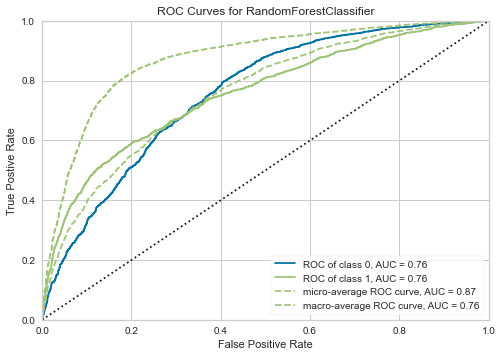

In [ ]:
plot_model(tuned_rf, plot = 'auc')

### 10.2 Precision-Recall Curve

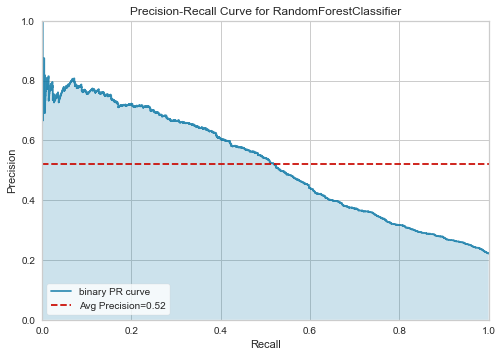

In [ ]:
plot_model(tuned_rf, plot = 'pr')

### 10.3 Feature Importance Plot

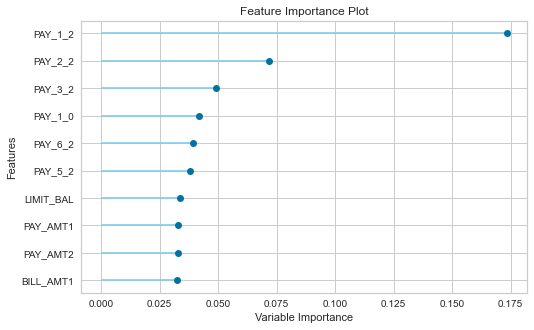

In [ ]:
plot_model(tuned_rf, plot='feature')

### 10.4 Confusion Matrix

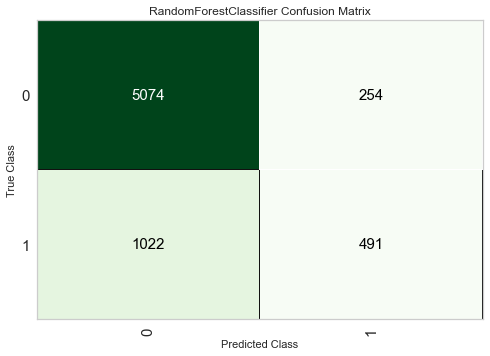

In [ ]:
plot_model(tuned_rf, plot = 'confusion_matrix')

*Another* way to analyze the performance of models is to use the `evaluate_model()` function which displays a user interface for all of the available plots for a given model. It internally uses the `plot_model()` function. 

In [ ]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 11.0 Predict on test / hold-out Sample

Before finalizing the model, it is advisable to perform one final check by predicting the test/hold-out set and reviewing the evaluation metrics. If you look at the information grid in Section 6 above, you will see that 30% (6,841 samples) of the data has been separated out as test/hold-out sample. All of the evaluation metrics we have seen above are cross validated results based on the training set (70%) only. Now, using our final trained model stored in the `tuned_rf` variable we will predict against the hold-out sample and evaluate the metrics to see if they are materially different than the CV results.

In [ ]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8135,0.7563,0.3245,0.6591,0.4349,0.3383,0.3688


The accuracy on test/hold-out set is **`0.8135`** compared to **`0.8225`** achieved on the `tuned_rf` CV results (in section 9.3 above). This is not a significant difference. If there is a large variation between the test/hold-out and CV results, then this would normally indicate over-fitting but could also be due to several other factors and would require further investigation. In this case, we will move forward with finalizing the model and predicting on unseen data (the 5% that we had separated in the beginning and never exposed to PyCaret).

(TIP : It's always good to look at the standard deviation of CV results when using `create_model()`.)

# 12.0 Finalize Model for Deployment

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with `setup()`, followed by comparing all models using `compare_models()` and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The `finalize_model()` function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [ ]:
final_rf = finalize_model(tuned_rf)

In [ ]:
#Final Random Forest model parameters for deployment
print(final_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


**Caution:** One final word of caution. Once the model is finalized using `finalize_model()`, the entire dataset including the test/hold-out set is used for training. As such, if the model is used for predictions on the hold-out set after `finalize_model()` is used, the information grid printed will be misleading as you are trying to predict on the same data that was used for modeling. In order to demonstrate this point only, we will use `final_rf` under `predict_model()` to compare the information grid with the one above in section 11. 

In [ ]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8345,0.8222,0.3629,0.7657,0.4924,0.4082,0.4489


Notice how the AUC in `final_rf` has increased to **`0.8222`** from **`0.7563`**, even though the model is the same. This is because the `final_rf` variable has been trained on the complete dataset including the test/hold-out set.

# 13.0 Predict on unseen data

The `predict_model()` function is also used to predict on the unseen dataset. The only difference from section 11 above is that this time we will pass the `data_unseen` parameter. `data_unseen` is the variable created at the beginning of the tutorial and contains 5% (1200 samples) of the original dataset which was never exposed to PyCaret. (see section 5 for explanation)

In [ ]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.1891
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.0481
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.1685
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.7434
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.2173


The `Label` and `Score` columns are added onto the `data_unseen` set. Label is the prediction and score is the probability of the prediction. Notice that predicted results are concatenated to the original dataset while all the transformations are automatically performed in the background. You can also check the metrics on this since you have actual target column `default` available. To do that we will use `pycaret.utils` module. See example below:

In [ ]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.default, unseen_predictions.Label, 'Accuracy')

0.8125

# 14.0 Saving the model

We have now finished the experiment by finalizing the `tuned_rf` model which is now stored in `final_rf` variable. We have also used the model stored in `final_rf` to predict `data_unseen`. This brings us to the end of our experiment, but one question is still to be asked: What happens when you have more new data to predict? Do you have to go through the entire experiment again? The answer is no, PyCaret's inbuilt function `save_model()` allows you to save the model along with entire transformation pipeline for later use.

In [ ]:
save_model(dt,'Final RF Model 08Feb2020')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='default',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                         criterion='gini', max_depth=None,
                        

(TIP : It's always good to use date in the filename when saving models, it's good for version control.)

# 15.0 Loading the saved model

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's `load_model()` function and then easily apply the saved model on new unseen data for prediction.

In [ ]:
saved_final_rf = load_model('Final RF Model 08Feb2020')

Transformation Pipeline and Model Sucessfully Loaded


Once the model is loaded in the environment, you can simply use it to predict on any new data using the same `predict_model()` function. Below we have applied the loaded model to predict the same `data_unseen` that we used in section 13 above.

In [ ]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)

In [ ]:
new_prediction.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.1891
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.0481
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.1685
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.7434
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.2173


Notice that the results of `unseen_predictions` and `new_prediction` are identical.

In [ ]:
from pycaret.utils import check_metric
check_metric(new_prediction.default, new_prediction.Label, 'Accuracy')

0.8125

# 16.0 Wrap-up / Next Steps?

This tutorial has covered the entire machine learning pipeline from data ingestion, pre-processing, training the model, hyperparameter tuning, prediction and saving the model for later use. We have completed all of these steps in less than 10 commands which are naturally constructed and very intuitive to remember such as `create_model()`, `tune_model()`, `compare_models()`. Re-creating the entire experiment without PyCaret would have taken well over 100 lines of code in most libraries.

We have only covered the basics of `pycaret.classification`. In following tutorials we will go deeper into advanced pre-processing, ensembling, generalized stacking and other techniques that allow you to fully customize your machine learning pipeline and are must know for any data scientist.

See you at the next tutorial. Follow the link to __[Binary Classification Tutorial (CLF102) - Intermediate Level](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Intermediate%20-%20CLF102.ipynb)__